In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
url = "https://cartobat.com/434152544F42415450616C616973656175/getRawDataForCartoWear/E91FBA6564D2/2022-09-23%2008:45:00.000/2022-09-23%2015:00:00.000"
reponse = requests.get(url)
print(reponse)

<Response [200]>


In [2]:
contenu = reponse.json()
contenu['resultat']
pd.DataFrame(contenu['resultat'])

KeyError: 'resultat'

In [8]:
list_capteurs = ['C45BBE384CD2', 'C45BBE386362', 'C45BBE386952', 'C45BBE39870E', 'C45BBE39F42A', 'C45BBE39F56A', 'C45BBE39F9AE', 'AB032A311FAA', 'A8032A31204E', 'C45BBE37B346']

In [49]:
import csv
for i in range(10):
    myfile = list_capteurs[i] + '.csv'
    with open(myfile,'w',newline='') as f:
        ecrire=csv.writer(f)
        ecrire.writerow([list_capteurs[i]])
        for mesure in contenu['resultat']:
            if mesure['macModule'] == list_capteurs[i]:
                if '2022-09-23 14:32:00.000' < mesure['timestamp'] < '2022-09-23 14:36:00.000':
                    ecrire.writerow([mesure['rssi']])

In [50]:
dataFrame = pd.concat(map(pd.read_csv, [list_capteurs[i]+'.csv' for i in range(10)]), ignore_index=True)
dataFrame = dataFrame.fillna(0.0)

In [51]:
dataFrame.to_csv(path_or_buf='csv_M_46.csv', decimal='.', sep= ',', index=False)

In [4]:
capt1 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt2 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt3 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt4 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt5 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt6 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt7 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt8 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt9 = pd.DataFrame(columns=[metre for metre in range(31, 61)])
capt10 = pd.DataFrame(columns=[metre for metre in range(31, 61)])

In [5]:
dict = {'C45BBE384CD2' : capt1, 'C45BBE386362' : capt2, 'C45BBE386952' : capt3, 'C45BBE39870E' : capt4, 'C45BBE39F42A' : capt5, 'C45BBE39F56A' : capt6, 'C45BBE39F9AE' : capt7, 'AB032A311FAA' : capt8, 'A8032A31204E' : capt9, 'C45BBE37B346' : capt10}

In [6]:
for metre in range(31, 61):
    path = './Data_metres/csv_M_' + str(metre) + '.csv'
    df = pd.read_csv(path)
    for col in df.columns:
        df2=pd.DataFrame(df[col])
        for index, row in df2.iterrows():
            if row[0] == 0:
                df2 = df2.drop(index, 0)
            dict[col][metre]=df2

C:\Users\matth\AppData\Local\Temp\ipykernel_7600\1623467752.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop(index, 0)
C:\Users\matth\AppData\Local\Temp\ipykernel_7600\1623467752.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop(index, 0)
C:\Users\matth\AppData\Local\Temp\ipykernel_7600\1623467752.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop(index, 0)
C:\Users\matth\AppData\Local\Temp\ipykernel_7600\1623467752.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop(index, 0)
C:\Users\matth\AppData\Local\Temp\ipykernel_7600\1623467752.py:8: FutureWarning: In a future version

In [8]:
for capteur in list_capteurs:
    dict[capteur].to_csv(path_or_buf='./Data_capteurs/csv_' + capteur + '.csv', decimal='.', sep= ',', index=False)

In [ ]:
df = pd.read_csv('./Data_capteurs/csv_A8032A31204E.csv')
df.transpose().plot(style='+', legend=False, title='Répartition des rssi selon la position pour le capteur A8032A31204E')

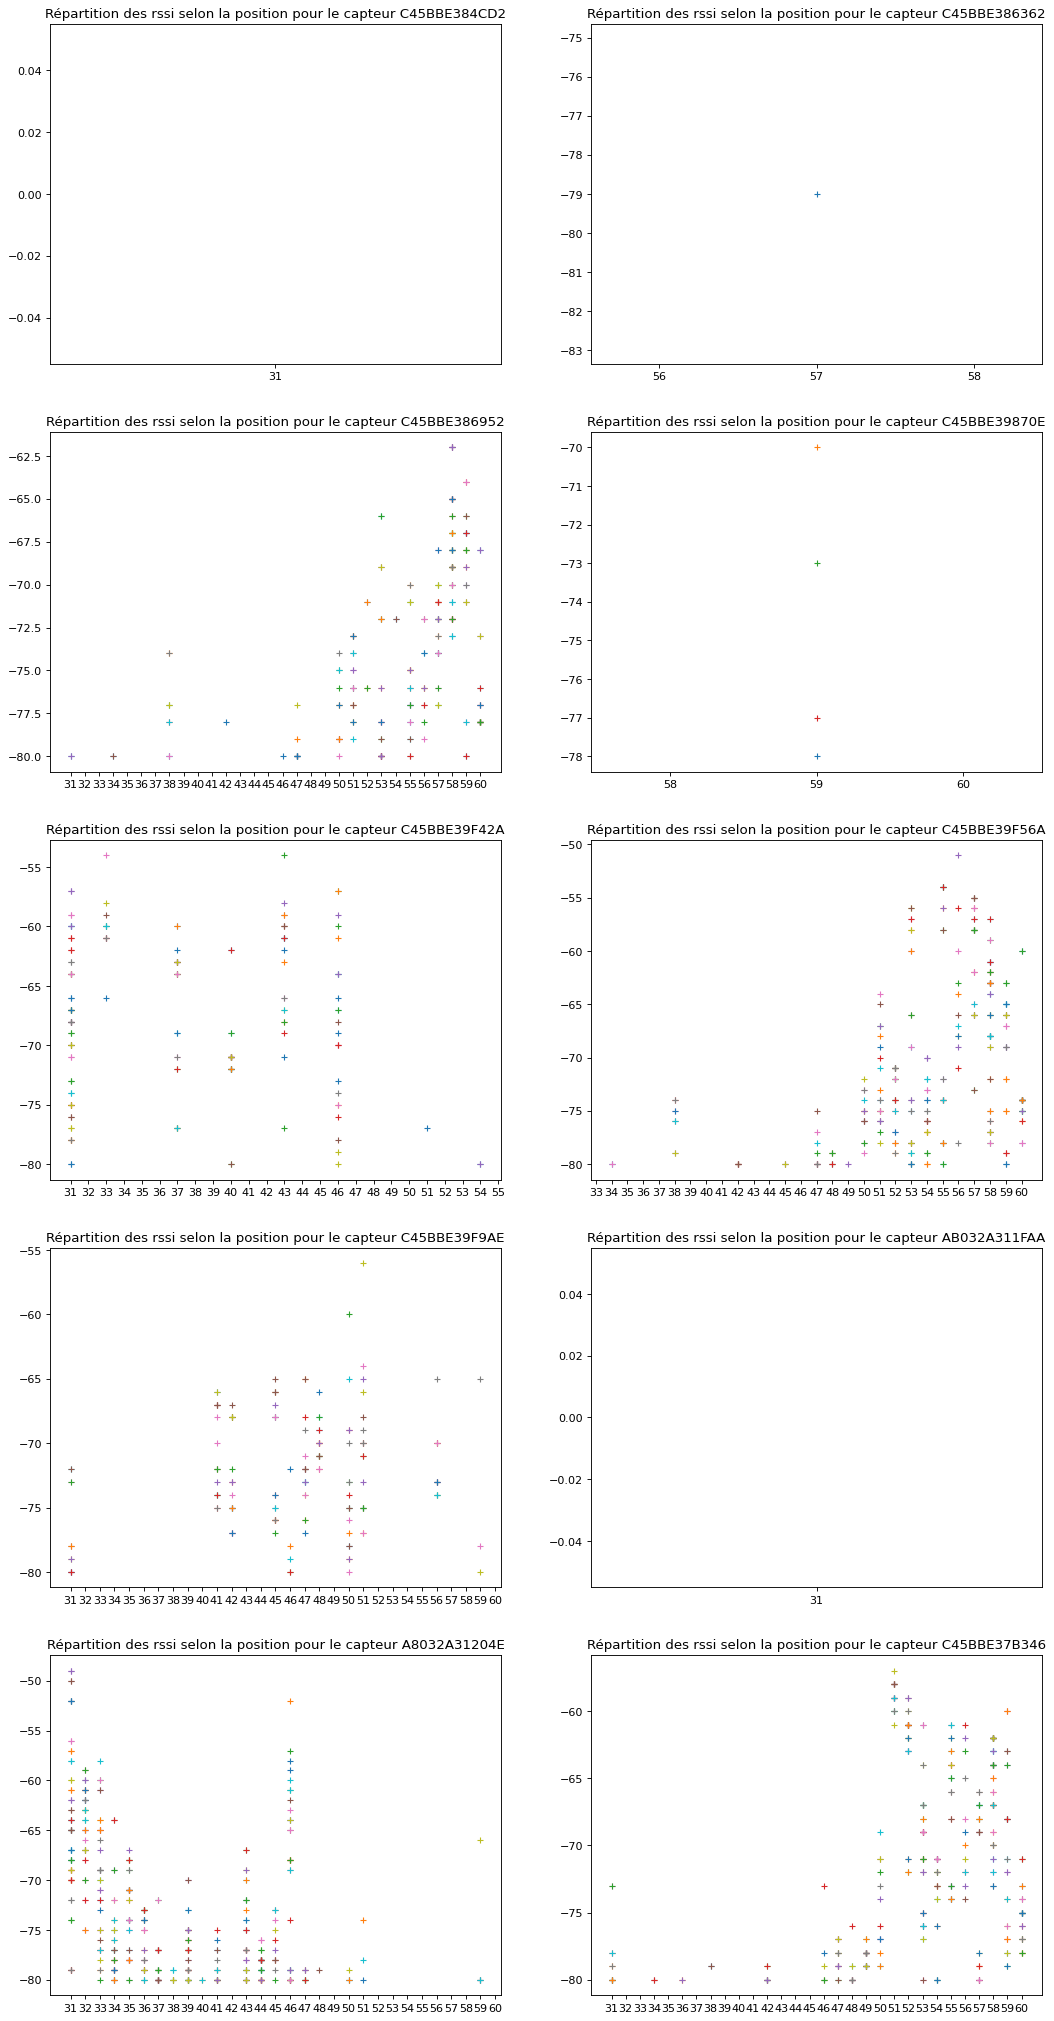

In [9]:
plt.figure(figsize=(16, 32), dpi=80)
for i, capteur in enumerate(list_capteurs):
    df = pd.read_csv('./Data_capteurs/csv_'+capteur+'.csv')
    plt.subplot(5, 2, i+1)
    plt.plot(df.transpose(), '+')
    plt.title(f'Répartition des rssi selon la position pour le capteur {capteur}')

In [2]:
list_capteurs_dist = {'C45BBE384CD2' : 0, 'C45BBE386362' : 80, 'C45BBE386952' : 65, 'C45BBE39870E' : 0, 'C45BBE39F42A' : 0, 'C45BBE39F56A' : 56, 'C45BBE39F9AE' : 13, 'AB032A311FAA' : 4, 'A8032A31204E' : 29, 'C45BBE37B346' : 52}

In [2]:
df = pd.read_csv('./Selected/A8032A31204E.csv')

In [3]:
list_capteurs = ['C45BBE384CD2', 'C45BBE386362', 'C45BBE386952', 'C45BBE39F56A', 'C45BBE39F9AE', 'A8032A31204E', 'C45BBE37B346']
list_capteurs_dist = {'C45BBE384CD2' : 75, 'C45BBE386362' : 80, 'C45BBE386952' : 65, 'C45BBE39F56A' : 56, 'C45BBE39F9AE' : 13, 'A8032A31204E' : 29, 'C45BBE37B346' : 52}

In [10]:
df = pd.DataFrame(pd.read_csv('./Selected/C45BBE384CD2.csv')[str(70.0)])
for index, row in df.iterrows():
    print(row[0])

KeyError: '70.0'

In [47]:
print(df.columns[0] == str(float(df.columns[0])))

True


In [17]:
L=[[]]*8
L

[[], [], [], [], [], [], [], []]